In [5]:
import tensorflow as tf
#import tensorflowjs as tjs
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense ,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
(train_x,train_y),(test_x,test_y) = fashion_mnist.load_data()

In [ ]:
train_x = np.expand_dims(train_x,-1) #to make each example 28x28x1
test_x = np.expand_dims(test_x,-1)

In [ ]:
train_x = train_x/255.0
test_x = test_x/255.0

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

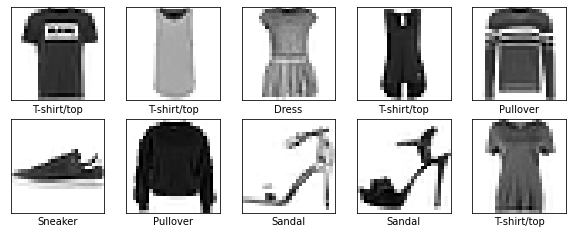

In [ ]:
ax = plt.figure(figsize=(10,10))
for i in range(1,11):
 # index = i if i<=5 else i-5
  one = ax.add_subplot(5,5,i) 
  plt.imshow(train_x[i][:,:,-1],cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  #one.set_title(train_y[i])
  plt.xlabel(class_names[train_y[i]])

In [ ]:
i = Input(shape=(28,28,1))
x = Conv2D(32,(3,3),padding='same',activation='relu')(i)
x = MaxPooling2D()(x)
x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(128,(3,3),padding='same',activation='relu')(x)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dense(10,activation='softmax')(x)

model = Model(i,x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 128)         0     

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
r = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y))

Epoch 1/10
1875/1875 [==============================] - 104s 56ms/step - loss: 0.2732 - accuracy: 0.9010 - val_loss: 0.2920 - val_accuracy: 0.8948
Epoch 2/10
1875/1875 [==============================] - 105s 56ms/step - loss: 0.2259 - accuracy: 0.9162 - val_loss: 0.2585 - val_accuracy: 0.9030
Epoch 3/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1969 - accuracy: 0.9263 - val_loss: 0.2472 - val_accuracy: 0.9115
Epoch 4/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1699 - accuracy: 0.9369 - val_loss: 0.2429 - val_accuracy: 0.9164
Epoch 5/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.1490 - accuracy: 0.9435 - val_loss: 0.2422 - val_accuracy: 0.9184
Epoch 6/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1276 - accuracy: 0.9519 - val_loss: 0.2502 - val_accuracy: 0.9207
Epoch 7/10
1875/1875 [==============================] - 103s 55ms/step - loss: 0.1119 - accuracy: 0.9571 - val_loss: 0

In [ ]:
model.evaluate(test_x,test_y)

313/313 [==============================] - 5s 17ms/step - loss: 0.3181 - accuracy: 0.9202


[0.31805720925331116, 0.920199990272522]

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x = r.epoch , y = r.history['loss'],name='loss'))
fig.add_trace(go.Line(x = r.epoch , y = r.history['val_loss'],name='val_loss'))
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = go.Figure()
fig.add_trace(go.Line(x = r.epoch , y = r.history['accuracy'],name='accuracy'))
fig.add_trace(go.Line(x = r.epoch , y = r.history['val_accuracy'],name='val_accuracy'))
fig.update_layout(title='Accuracy Measurment',xaxis_title='accuracy',yaxis_title='epochs')
fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Confusion matrix, without normalization
[[878   1  14   7   4   1  83   0  12   0]
 [  2 989   0   3   3   0   2   0   1   0]
 [ 15   1 877   5  59   0  42   0   1   0]
 [ 21  12  10 850  61   0  40   0   5   1]
 [  1   0  31  10 915   0  42   0   1   0]
 [  0   0   0   0   0 970   0  13   0  17]
 [ 79   0  46  12  68   0 787   0   8   0]
 [  0   0   0   0   0   3   0 969   0  28]
 [  2   1   1   0   1   0   1   3 991   0]
 [  0   0   1   0   0   3   0  20   0 976]]


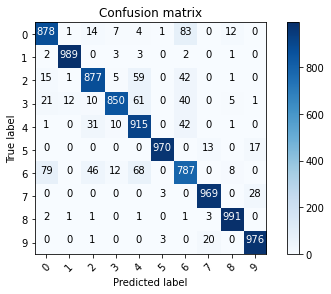

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(test_x).argmax(axis=1)
cm = confusion_matrix(test_y, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
fig = go.Figure(data=go.Heatmap(
    z = confusion_matrix(test_y,p_test),
    x = class_names,
    y = class_names,
    hoverongaps = False
))
fig.update_layout(title='Confution Matrix',xaxis_title='Predicted',yaxis_title='True')
fig.show()

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(confusion_matrix(test_y,p_test), x=class_names, y=class_names, annotation_text=None, colorscale='Viridis')
fig.show()

## CiFAR Model

In [6]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import Callback

In [7]:
(train_x,train_y),(test_x,test_y) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
train_x.shape

(50000, 32, 32, 3)

In [ ]:
px.imshow(train_x[0])

In [ ]:
print(train_y[0])

[6]


In [1]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
# Build the model using the functional API
i = Input(shape=train_x[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [10]:
train_x = train_x/255.0
test_x = test_x/255.0

In [11]:
train_y,test_y = train_y.flatten(),test_y.flatten()

In [12]:
class myCallback(Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy')>=0.98:
      self.model.stop_training=True
callback = myCallback()

In [13]:
batch_size = 32
generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = generator.flow(train_x,train_y, batch_size)
steps_per_epoch = train_x.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(test_x, test_y), steps_per_epoch=steps_per_epoch, epochs=100,callbacks=[callback])

Epoch 1/100
1562/1562 [==============================] - 34s 17ms/step - loss: 1.8390 - accuracy: 0.4244 - val_loss: 1.1391 - val_accuracy: 0.6034
Epoch 2/100
1562/1562 [==============================] - 26s 17ms/step - loss: 1.0092 - accuracy: 0.6476 - val_loss: 0.9872 - val_accuracy: 0.6668
Epoch 3/100
1562/1562 [==============================] - 25s 16ms/step - loss: 0.8663 - accuracy: 0.7010 - val_loss: 0.7969 - val_accuracy: 0.7291
Epoch 4/100
1562/1562 [==============================] - 25s 16ms/step - loss: 0.7621 - accuracy: 0.7363 - val_loss: 0.7828 - val_accuracy: 0.7461
Epoch 5/100
1562/1562 [==============================] - 26s 16ms/step - loss: 0.6837 - accuracy: 0.7674 - val_loss: 0.6874 - val_accuracy: 0.7690
Epoch 6/100
1562/1562 [==============================] - 26s 16ms/step - loss: 0.6392 - accuracy: 0.7834 - val_loss: 0.7751 - val_accuracy: 0.7382
Epoch 7/100
1562/1562 [==============================] - 25s 16ms/step - loss: 0.5943 - accuracy: 0.7954 - val_loss: 0

In [14]:
model.save("cifar.h5")

In [15]:
!ls

cifar.h5  sample_data


In [16]:
from google.colab import files
files.download('cifar.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Build the model using the functional API
i = Input(shape=(400,400,3))
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
#x = 
#x = Dropout(0.2)(x)
#x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing import image

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
img = image.load_img('/content/drive/MyDrive/IMG_20180220_140742.jpg',target_size=(400,400))

In [ ]:
img1 = image.img_to_array(img)

In [ ]:
img2 = img1.reshape(1,400,400,3)

In [ ]:
r = model.predict(img2)

In [ ]:
r.shape

(1, 128)

In [ ]:
r2 = model.predict(img2)

In [ ]:
r2.shape

(1, 128)

In [ ]:
 np.linalg.norm(r-r)

0.0

In [ ]:
r2

array([[ 0.        ,  9.203527  ,  0.        ,  0.        ,  0.        ,
         3.0610962 ,  5.890499  ,  1.1101613 ,  0.        ,  9.700738  ,
         0.        ,  2.346511  ,  0.        ,  4.0518665 ,  0.        ,
         3.1031363 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  2.0206974 ,  0.        ,  2.7215722 ,
         0.        ,  0.19594944,  0.        ,  0.        ,  4.9289145 ,
         0.        ,  0.        ,  0.        ,  2.5430446 ,  0.        ,
         0.        ,  0.        ,  0.        ,  3.0996032 ,  0.        ,
         0.        ,  7.204568  ,  0.24534863,  0.        ,  4.788033  ,
         0.        ,  5.0111017 ,  0.93135905,  0.23668501,  3.7090275 ,
         0.        ,  8.574256  ,  7.171001  ,  1.6462729 ,  0.        ,
         1.6713643 ,  0.        ,  0.        ,  0.        ,  1.8797146 ,
         0.        ,  1.6165202 , 13.697485  ,  0.        ,  0.        ,
         0.        ,  8.747259  ,  4.275018  ,  2.2

In [ ]:
r

array([[0.0000000e+00, 1.3565423e+01, 0.0000000e+00, 3.4570103e+00,
        0.0000000e+00, 6.1246433e+00, 9.2395239e+00, 0.0000000e+00,
        0.0000000e+00, 1.0840280e+01, 5.0502911e+00, 5.6897278e+00,
        0.0000000e+00, 4.4822378e+00, 2.4625611e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.7600060e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0205683e+01, 6.6504776e-03, 4.0161204e+00, 0.0000000e+00,
        0.0000000e+00, 1.3638923e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.2859304e-01, 4.3213296e-01, 0.0000000e+00,
        6.0418501e+00, 1.1085764e+01, 2.1837790e+00, 2.2320482e-01,
        1.2276361e+01, 0.0000000e+00, 4.7047958e+00, 0.0000000e+00,
        2.2201495e+00, 1.8708739e+00, 0.0000000e+00, 9.1333551e+00,
        4.1277456e+00, 2.6078300e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.9033742e-01, 0.0000000e